## Lab 8 Support Vector Machine - Classification of Iris Flowers

## Data Description
Iris data Set Description:
https://en.wikipedia.org/wiki/Iris_flower_data_set

Fisher’s Iris data base (Fisher, 1936) is perhaps the best known
database to be found in the pattern recognition literature. The data
set contains 3 classes of 50 instances each, where each class refers
to a type of iris plant. One class is linearly separable from the other
two; the latter are not linearly separable from each other.
The data base contains the following attributes:

1). sepal length in cm

2). sepal width in cm

3). petal length in cm

4). petal width in cm

5). class:
- Iris Setosa
- Iris Versicolour
- Iris Virginica


![alt text](iris-machinelearning.png "Title")

![alt text](versicolor.jpg "Title")

In [20]:
#Import necessary libraries
import numpy as np
import pandas as pd

In [21]:
#Load dataset
dataset=pd.read_csv("iris.csv")

In [22]:
#Print number of rows and columns
dataset.shape

(150, 6)

In [23]:
#Print dataframe info - data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [24]:
#Print attribute names
dataset.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
#Print top 5 rows
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
#Print bootom 5 rows
dataset.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
#Print the unique class labels

#pd.unique(dataset['Species'])
dataset.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [28]:
#Print no of examples from each class label
dataset['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [29]:
#Print number of missing values in each column
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [30]:
#Drop the 'Id' column
dataset=dataset.drop(columns='Id')

In [31]:
#Print summary statistics
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F632AA76D8>,
      dtype=object)

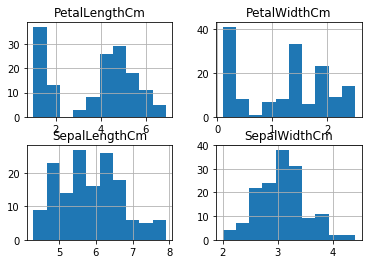

In [32]:
#Plot histogrma of all input features
dataset.hist()

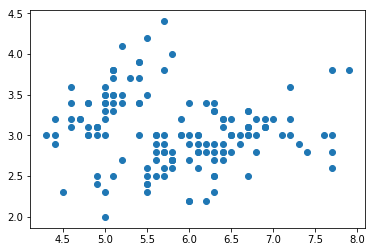

In [33]:
# Create a scatter plot of - 'SepalLengthCm' vs "SepalWidthCm"
import matplotlib.pyplot as plt
plt.scatter(dataset['SepalLengthCm'],dataset['SepalWidthCm'])
plt.show()

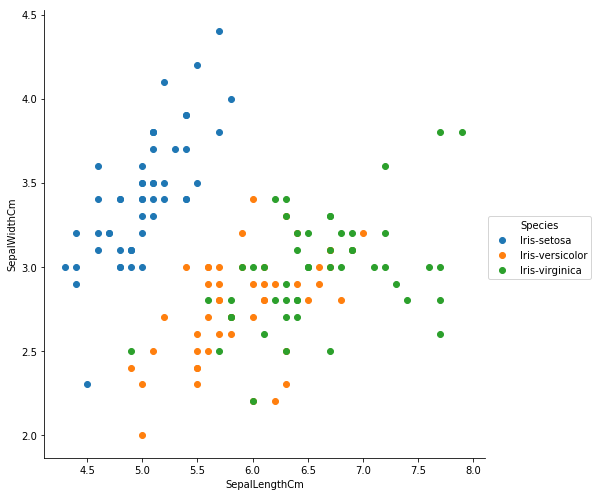

In [34]:
# Create a scatter plot of - 'SepalLengthCm' vs "SepalWidthCm" using seaborn's FacetGrid to color the scatterplot by species
#sns.FacetGrid(iris, hue="Species", size=7).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

import seaborn as sns
sns.FacetGrid(dataset, hue="Species", size=7).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()


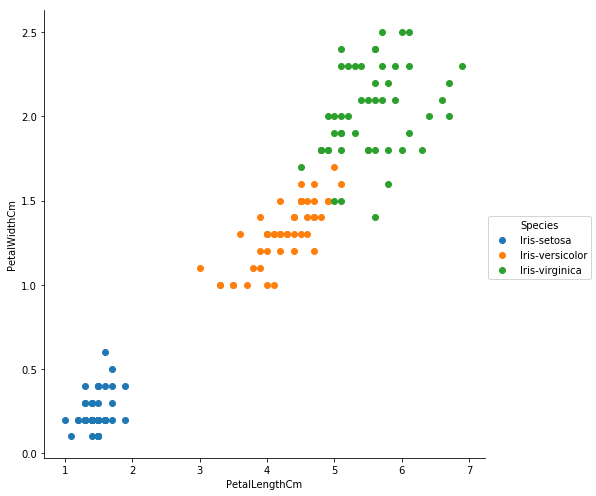

In [35]:
# Create a scatter plot of - 'PetalLengthCm' vs "PetalWidthCm" using seaborn's FacetGrid to color the scatterplot by species
sns.FacetGrid(dataset, hue="Species", size=7).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

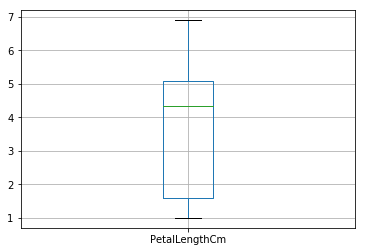

In [36]:
#Boxplot of PetalLength for different species
dataset.boxplot(column="PetalLengthCm")

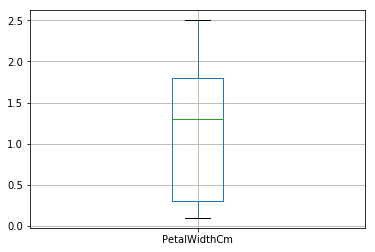

In [37]:
#Boxplot of PetalWidth for different species
dataset.boxplot(column="PetalWidthCm")

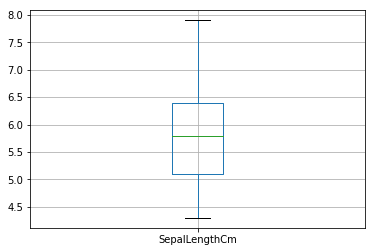

In [38]:
#Boxplot of SepalLength for different species
dataset.boxplot(column="SepalLengthCm")

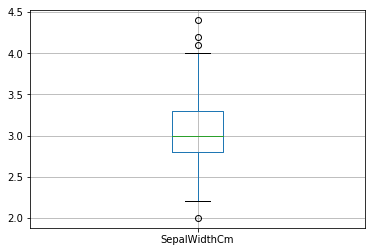

In [39]:
#Boxplot of Sepalwidth for different species
dataset.boxplot(column="SepalWidthCm")


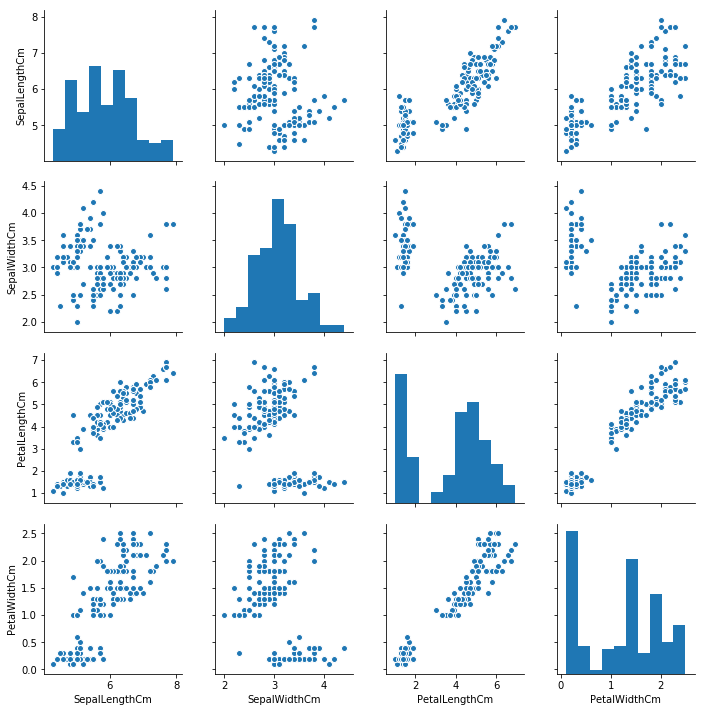

In [40]:
#Pairplot of all input features colored by species - (Hint: use the hue parameter)
sns.pairplot(dataset)

In [41]:
#Print the correlations among different features
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Model Building

In [42]:
#Prepare X and y
X=dataset.iloc[:,:-1]
Y=dataset.Species
from sklearn.preprocessing import LabelEncoder
L=LabelEncoder()
Y=L.fit_transform(Y)
Y.shape

(150,)

In [43]:
#Split into train and test data - 70% train 30% test, random_state=1
from sklearn.cross_validation import train_test_split as t
X_train,X_test,Y_train,Y_test=t(X,Y,test_size=0.3,random_state=1)
Y_train

C:\Users\venu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0], dtype=int64)

In [44]:
#Look at the documnetation of the SVC class that you will use to create the model


In [45]:
# Model building
from sklearn.svm import SVC
# Instantiate an object of class SVC() using cost C=1
classifier=SVC(C=1)

# fit the model
classifier.fit(X_train,Y_train)

# predict using the model
pred=classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(pred,Y_test)



0.9777777777777777

In [46]:
# Evaluate the model using confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(pred,Y_test)

array([[14,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 13]], dtype=int64)

In [47]:
# Print other metrics
# Printing classification report and accuracy

from sklearn.metrics import classification_report
classification_report(pred,Y_test)


'             precision    recall  f1-score   support\n\n          0       1.00      1.00      1.00        14\n          1       0.94      1.00      0.97        17\n          2       1.00      0.93      0.96        14\n\navg / total       0.98      0.98      0.98        45\n'

### K-Fold Cross Validation

Run a simple k-fold cross validation to get a sense of the **average metrics** as computed over multiple *folds*. the easiest way to do cross-validation is to use the ```cross_val_score()``` function.

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 1)

In [49]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric

cv_results = cross_val_score(model, X_train, Y_train, cv = folds, scoring = 'accuracy') 

In [50]:
# print 5 accuracies obtained from the 5 folds
print(cv_results)
print("mean accuracy = {}".format(cv_results.mean()))

[0.95238095 1.         1.         0.95238095 0.95238095]
mean accuracy = 0.9714285714285715


In [51]:
# Use GridSearchCV to find optimal value of C - See Decision Tree Lab questions for code
# Try with C = [0.1, 1, 10, 100, 1000]
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':(0.1,1,10,100,1000),'gamma': (1,2,3,'auto'),
              'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}

Classifier=GridSearchCV(classifier,parameters)
Classifier.fit(X_train,Y_train)
Classifier.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [52]:
#Print the scores of GridSearchCV as dataframe
Classifier.best_score_

0.9809523809523809

(0.1, 1, 10, 100, 1000)
[0.9619047619047619, 0.9809523809523809, 0.9809523809523809, 1.0, 1.0]
[0.9777777777777777, 1.0, 0.9777777777777777, 0.9555555555555556, 0.9555555555555556]


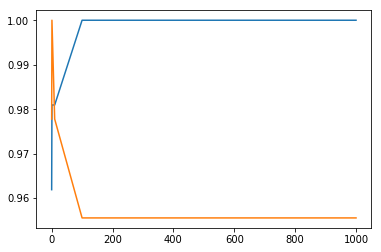

In [53]:
#Plot of C versus train and test scores
x=Classifier.param_grid['C']
train_ac=[]
test_ac=[]
for i in x:
    Classifier.param_grid['C']=[i]
    Classifier.fit(X_train,Y_train)
    train_ac.append(accuracy_score(Classifier.predict(X_train),Y_train))
    test_ac.append(accuracy_score(Classifier.predict(X_test),Y_test))
test_ac,train_ac

print(x)
print(train_ac)
print(test_ac)
plt.plot(x,train_ac)
plt.plot(x,test_ac)
plt.show()

In [54]:
#Print the best score and best C value - 
#modelCV.best_score_
Classifier.best_estimator_
Classifier.best_score_
Classifier.best_params_['C']
#modelCV.best_params_['C']
#modelCV is the GridSearchCV object



1000

In [55]:
#Try training model with other Kernels
